In [ ]:
df_lacity = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep=',', encoding='utf-8')
df_lacity.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
df_lacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766103 entries, 0 to 766102
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           766103 non-null  int64  
 1   Date Rptd       766103 non-null  object 
 2   DATE OCC        766103 non-null  object 
 3   TIME OCC        766103 non-null  int64  
 4   AREA            766103 non-null  int64  
 5   AREA NAME       766103 non-null  object 
 6   Rpt Dist No     766103 non-null  int64  
 7   Part 1-2        766103 non-null  int64  
 8   Crm Cd          766103 non-null  int64  
 9   Crm Cd Desc     766103 non-null  object 
 10  Mocodes         660902 non-null  object 
 11  Vict Age        766103 non-null  int64  
 12  Vict Sex        665906 non-null  object 
 13  Vict Descent    665900 non-null  object 
 14  Premis Cd       766094 non-null  float64
 15  Premis Desc     765654 non-null  object 
 16  Weapon Used Cd  266374 non-null  float64
 17  Weapon Des

In [ ]:
len(df_lacity)

766103

Insights =

1. Data Type Manipulation
* Date Rptd
* DATE OCC
* TIME OCC
* Victim Age
* Premis Cd
* Weapon Used Cd
---
2. Column Manipulation
* Date Rptd Remove
* Part 1-2 Remove
* Premis CD Remove
* Crm CD 1 Remove
* Crm CD 2 Remove
* Crm CD 3 Remove
* Crm CD 4 Remove
* Cross Street Remove
---
3. Missing Value
* Null Mocodes Exclude
* Set Null Weapon to Unknown Weapon Code 500
* Victim Sex Set to Unknown
* Victim Descent set to other/unknown

# A) Preparing Data

In [ ]:
import pandas as pd # Library used for working with data sets and perform data analysis.
import numpy as np # To perform mathematical operasion and statistics
from datetime import datetime # Used to perform dates and time manipulation
import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization

In [ ]:
df_kaggle = pd.read_csv('crime_in_la.csv', sep=',', encoding='utf-8')
df_kaggle.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [ ]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495410 entries, 0 to 495409
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           495410 non-null  int64  
 1   DATE OCC        495410 non-null  object 
 2   TIME OCC        495410 non-null  object 
 3   AREA            495410 non-null  int64  
 4   AREA NAME       495410 non-null  object 
 5   Rpt Dist No     495410 non-null  int64  
 6   Crm Cd          495410 non-null  int64  
 7   Crm Cd Desc     495410 non-null  object 
 8   Mocodes         495410 non-null  object 
 9   Vict Age        495410 non-null  int64  
 10  Vict Sex        495410 non-null  object 
 11  Vict Descent    495410 non-null  object 
 12  Premis Desc     495197 non-null  object 
 13  Weapon Used Cd  495410 non-null  float64
 14  Weapon Desc     495410 non-null  object 
 15  Status          495410 non-null  object 
 16  Status Desc     495410 non-null  object 
 17  LOCATION  

In [ ]:
len(df_kaggle)

495410

---

# B) Cleaning
- change data type from DATE OCC to time (year, month, day)
- change data type from TIME OCC to time (hour, minutes)
- there is no duplicated data
- remove extra spaces in column LOCATION
---
- Join Premis Cd
- Victim Age -1 and 0 (most likely, it'll change into 0)
- Remove Age 120 (outlier)
- Victim Sex H? (change into X)
- Missing Value in Premis Desc
- Missing Value in Premis Cd

---

In [ ]:
df_clean_1 = df_kaggle.copy()
df_clean_1.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


## Join Dataset

### For Column Premis Cd

In [ ]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495410 entries, 0 to 495409
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           495410 non-null  int64  
 1   DATE OCC        495410 non-null  object 
 2   TIME OCC        495410 non-null  object 
 3   AREA            495410 non-null  int64  
 4   AREA NAME       495410 non-null  object 
 5   Rpt Dist No     495410 non-null  int64  
 6   Crm Cd          495410 non-null  int64  
 7   Crm Cd Desc     495410 non-null  object 
 8   Mocodes         495410 non-null  object 
 9   Vict Age        495410 non-null  int64  
 10  Vict Sex        495410 non-null  object 
 11  Vict Descent    495410 non-null  object 
 12  Premis Desc     495197 non-null  object 
 13  Weapon Used Cd  495410 non-null  float64
 14  Weapon Desc     495410 non-null  object 
 15  Status          495410 non-null  object 
 16  Status Desc     495410 non-null  object 
 17  LOCATION  

In [ ]:
df_clean_1 = pd.merge(df_clean_1, df_lacity[['DR_NO', 'Premis Cd']], on='DR_NO', how='left')

In [ ]:
premis_desc_pos = df_clean_1.columns.get_loc('Premis Desc')

new_columns = list(df_clean_1.columns)
new_columns.remove('Premis Cd')
new_columns.insert(premis_desc_pos, 'Premis Cd')

df_clean_1 = df_clean_1[new_columns]

In [ ]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495410 entries, 0 to 495409
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           495410 non-null  int64  
 1   DATE OCC        495410 non-null  object 
 2   TIME OCC        495410 non-null  object 
 3   AREA            495410 non-null  int64  
 4   AREA NAME       495410 non-null  object 
 5   Rpt Dist No     495410 non-null  int64  
 6   Crm Cd          495410 non-null  int64  
 7   Crm Cd Desc     495410 non-null  object 
 8   Mocodes         495410 non-null  object 
 9   Vict Age        495410 non-null  int64  
 10  Vict Sex        495410 non-null  object 
 11  Vict Descent    495410 non-null  object 
 12  Premis Cd       495077 non-null  float64
 13  Premis Desc     495197 non-null  object 
 14  Weapon Used Cd  495410 non-null  float64
 15  Weapon Desc     495410 non-null  object 
 16  Status          495410 non-null  object 
 17  Status Des

In [ ]:
# df_clean_1['Premis Cd'] = df_clean_1['Premis Cd'].astype(int)

IntCastingNaNError: ignored

In [ ]:
df_clean_1['Premis Cd'].value_counts()

101.0    126621
501.0     81574
502.0     59564
108.0     36680
203.0     22479
          ...  
240.0         1
965.0         1
137.0         1
756.0         1
836.0         1
Name: Premis Cd, Length: 309, dtype: int64

In [ ]:
len(df_clean_1)

495410

## Data Type

### Column 'DATE OCC'

In [ ]:
# del crime_df

In [ ]:
# %who DataFrame

No variables match your requested type.


In [ ]:
pd.to_datetime(df_clean_1['DATE OCC'], format='%d/%m/%Y')

0        2020-01-08
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
495405   2022-03-20
495406   2022-02-23
495407   2022-02-09
495408   2022-02-08
495409   2022-02-14
Name: DATE OCC, Length: 495410, dtype: datetime64[ns]

In [ ]:
df_clean_1['DATE OCC'] = pd.to_datetime(df_clean_1['DATE OCC'], format='%d/%m/%Y')
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495410 entries, 0 to 495409
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           495410 non-null  int64         
 1   DATE OCC        495410 non-null  datetime64[ns]
 2   TIME OCC        495410 non-null  object        
 3   AREA            495410 non-null  int64         
 4   AREA NAME       495410 non-null  object        
 5   Rpt Dist No     495410 non-null  int64         
 6   Crm Cd          495410 non-null  int64         
 7   Crm Cd Desc     495410 non-null  object        
 8   Mocodes         495410 non-null  object        
 9   Vict Age        495410 non-null  int64         
 10  Vict Sex        495410 non-null  object        
 11  Vict Descent    495410 non-null  object        
 12  Premis Cd       495077 non-null  float64       
 13  Premis Desc     495197 non-null  object        
 14  Weapon Used Cd  495410 non-null  flo

In [ ]:
df_clean_1['DATE OCC'].value_counts().sort_index()

2020-01-01    995
2020-01-02    521
2020-01-03    593
2020-01-04    537
2020-01-05    503
             ... 
2022-05-26    463
2022-05-27    438
2022-05-28    435
2022-05-29    390
2022-05-30    134
Name: DATE OCC, Length: 881, dtype: int64



---



### Column 'TIME OCC'

In [ ]:
pd.to_datetime(df_clean_1['TIME OCC'], format='%H:%M').dt.time

0         22:30:00
1         03:30:00
2         17:30:00
3         04:15:00
4         00:30:00
            ...   
495405    01:00:00
495406    12:10:00
495407    15:30:00
495408    20:00:00
495409    18:00:00
Name: TIME OCC, Length: 495410, dtype: object

In [ ]:
df_clean_1['TIME OCC'] = pd.to_datetime(df_clean_1['TIME OCC'], format='%H:%M').dt.time

In [ ]:
df_clean_1['TIME OCC'].dtype

dtype('O')

In [ ]:
df_clean_1['TIME OCC'].value_counts().sort_index()

00:01:00    8264
00:02:00      70
00:03:00      82
00:04:00      67
00:05:00    1688
            ... 
23:55:00     672
23:56:00      27
23:57:00      36
23:58:00      34
23:59:00     322
Name: TIME OCC, Length: 1439, dtype: int64

---

## Data Manipulation

### Remove Extra Spaces ['LOCATION']

In [ ]:
df_clean_1['LOCATION'].value_counts()

800 N  ALAMEDA                      ST      955
7TH                          ST             847
7TH                                         846
6TH                          ST             839
6TH                                         783
                                           ... 
900    MT WASHINGTON                DR        1
12700    DE SANTIS                    AV      1
4400    BECK                         AV       1
22100    MARTINEZ                     ST      1
400    EXPOSITION                   BL        1
Name: LOCATION, Length: 56610, dtype: int64

In [ ]:
df_clean_1['LOCATION'] = df_clean_1['LOCATION'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
df_clean_1['LOCATION'].value_counts()

800 N ALAMEDA ST        955
7TH ST                  847
7TH                     846
6TH ST                  839
6TH                     783
                       ... 
2100 S VIEW ST            1
100 COPA DE ORO RD        1
ALLEGHENY AV              1
1500 W SANTA CRUZ ST      1
400 EXPOSITION BL         1
Name: LOCATION, Length: 56539, dtype: int64

In [ ]:
df_clean_1.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,22:30:00,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,03:30:00,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,2020-01-01,17:30:00,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,2020-01-01,04:15:00,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,...,X,409.0,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,2020-01-01,00:30:00,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,...,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534




---



### Change Vict Age -1 into 0

In [ ]:
df_clean_1.loc[df_clean_1['Vict Age'] == 0, 'Vict Age'].value_counts()

0    120799
Name: Vict Age, dtype: int64

In [ ]:
df_clean_1.loc[df_clean_1['Vict Age'] == -1, 'Vict Age'].value_counts()

-1    14
Name: Vict Age, dtype: int64

In [ ]:
df_clean_1['Vict Age'] = df_clean_1['Vict Age'].replace(-1, 0)

In [ ]:
df_clean_1['Vict Age'].value_counts()

0      120813
30      11355
35      11043
29      10840
31      10816
        ...  
95         51
96         44
98         39
97         33
120         1
Name: Vict Age, Length: 100, dtype: int64

### Remove Age 120

In [ ]:
df_clean_1 = df_clean_1[df_clean_1['Vict Age'] != 120]

In [ ]:
df_clean_1['Vict Age'].value_counts()

0     120813
30     11355
35     11043
29     10840
31     10816
       ...  
93        58
95        51
96        44
98        39
97        33
Name: Vict Age, Length: 99, dtype: int64

### Change Vict Sex H into X

In [ ]:
df_clean_1['Vict Sex'].value_counts()

M    208163
F    181122
X    106068
H        56
Name: Vict Sex, dtype: int64

In [ ]:
df_clean_1['Vict Sex'] = df_clean_1['Vict Sex'].replace('H', 'X')

In [ ]:
df_clean_1['Vict Sex'].value_counts()

M    208163
F    181122
X    106124
Name: Vict Sex, dtype: int64

In [ ]:
106068 + 56

106124

## Data Duplicates

In [ ]:
df_clean_1['DR_NO'].value_counts().duplicated()

10304468     False
210813774     True
211410548     True
210905503     True
211311004     True
             ...  
202110280     True
202012951     True
202107829     True
202014845     True
221605448     True
Name: DR_NO, Length: 495409, dtype: bool

In [ ]:
df_clean_1.loc[df_clean_1['DR_NO'] == 211307795]

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
330313,211307795,2021-03-27,15:00:00,13,Newton,1361,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 2004 1814 0416,55,...,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,300 W 45TH ST,34.0029,-118.2789


In [ ]:
duplicates = df_clean_1[df_clean_1.duplicated(subset=['DR_NO'], keep=False)]
duplicates

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON


In [ ]:
# all column check
duplicates = df_clean_1[df_clean_1.duplicated(keep=False)]
duplicates

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON


---

## Unique Values

In [ ]:
for col in df_clean_1.columns:
  print(col)
  print(df_clean_1[col].value_counts())
  print('\n')

DR_NO
10304468     1
210813774    1
211410548    1
210905503    1
211311004    1
            ..
202110280    1
202012951    1
202107829    1
202014845    1
221605448    1
Name: DR_NO, Length: 495409, dtype: int64


DATE OCC
2020-01-01    995
2020-05-30    911
2022-04-01    890
2022-02-01    867
2022-03-01    857
             ... 
2020-03-29    420
2020-03-22    416
2020-04-09    415
2022-05-29    390
2022-05-30    134
Name: DATE OCC, Length: 881, dtype: int64


TIME OCC
12:00:00    17944
18:00:00    13777
17:00:00    12991
20:00:00    12812
19:00:00    11924
            ...  
07:41:00        8
07:57:00        8
05:34:00        7
06:42:00        6
05:31:00        6
Name: TIME OCC, Length: 1439, dtype: int64


AREA
12    31537
1     31225
14    29496
3     27374
6     26941
18    25470
15    25235
20    24897
13    24311
8     23082
7     23025
2     22778
11    21571
5     21110
9     20953
19    20306
10    20275
21    20131
17    19679
4     18947
16    17066
Name: AREA, dtype: int64


In [ ]:
len(df_clean_1)

495409

Because we remove outlier with the age of 120 (only 1 data/record)

## Missing Value

### Column Premis Cd & Premis Desc

In [ ]:
df_clean_2 = df_clean_1.copy()
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495409 entries, 0 to 495409
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           495409 non-null  int64         
 1   DATE OCC        495409 non-null  datetime64[ns]
 2   TIME OCC        495409 non-null  object        
 3   AREA            495409 non-null  int64         
 4   AREA NAME       495409 non-null  object        
 5   Rpt Dist No     495409 non-null  int64         
 6   Crm Cd          495409 non-null  int64         
 7   Crm Cd Desc     495409 non-null  object        
 8   Mocodes         495409 non-null  object        
 9   Vict Age        495409 non-null  int64         
 10  Vict Sex        495409 non-null  object        
 11  Vict Descent    495409 non-null  object        
 12  Premis Cd       495076 non-null  float64       
 13  Premis Desc     495196 non-null  object        
 14  Weapon Used Cd  495409 non-null  flo

In [ ]:
df_clean_2[['Premis Cd', 'Premis Desc', 'DR_NO']].count()

Premis Cd      495076
Premis Desc    495196
DR_NO          495409
dtype: int64

In [ ]:
1 * (495197/495410)

0.9995700530873418

In [ ]:
1 * (494869/495410)

0.9989079752124503

In [ ]:
df_clean_2 = df_clean_2.dropna(subset=['Premis Desc'])

In [ ]:
df_clean_2 = df_clean_2.dropna(subset=['Premis Cd'])

In [ ]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494868 entries, 0 to 495409
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           494868 non-null  int64         
 1   DATE OCC        494868 non-null  datetime64[ns]
 2   TIME OCC        494868 non-null  object        
 3   AREA            494868 non-null  int64         
 4   AREA NAME       494868 non-null  object        
 5   Rpt Dist No     494868 non-null  int64         
 6   Crm Cd          494868 non-null  int64         
 7   Crm Cd Desc     494868 non-null  object        
 8   Mocodes         494868 non-null  object        
 9   Vict Age        494868 non-null  int64         
 10  Vict Sex        494868 non-null  object        
 11  Vict Descent    494868 non-null  object        
 12  Premis Cd       494868 non-null  float64       
 13  Premis Desc     494868 non-null  object        
 14  Weapon Used Cd  494868 non-null  flo

In [ ]:
len(df_clean_2)

494868

In [ ]:
df_clean_2['DATE OCC'].value_counts().sort_index()

2020-01-01    994
2020-01-02    520
2020-01-03    593
2020-01-04    537
2020-01-05    503
             ... 
2022-05-26    459
2022-05-27    433
2022-05-28    428
2022-05-29    386
2022-05-30    134
Name: DATE OCC, Length: 881, dtype: int64



---



## SAVE DATA CLEANED

In [ ]:
df_clean_2.to_csv('df_clean_2.csv', index=False)

---

In [ ]:
# del crime_df

In [ ]:
# crime_df

In [ ]:
crime_df = df_clean_1.copy()
crime_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,22:30:00,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,03:30:00,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,2020-01-01,17:30:00,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,2020-01-01,04:15:00,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,2020-01-01,00:30:00,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [ ]:
crime = df_clean_1.copy()
crime

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,22:30:00,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,03:30:00,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,2020-01-01,17:30:00,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,2020-01-01,04:15:00,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,2020-01-01,00:30:00,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495405,221907283,2022-03-20,01:00:00,19,Mission,1901,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,37,M,W,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 BALBOA BL,34.3226,-118.4905
495406,221906145,2022-02-23,12:10:00,19,Mission,1985,421,THEFT FROM MOTOR VEHICLE - ATTEMPT,1822 1402,48,F,H,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,8400 VAN NUYS BL,34.2229,-118.4487
495407,221005507,2022-02-09,15:30:00,10,West Valley,1024,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426
495408,221105477,2022-02-08,20:00:00,11,Northeast,1171,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,4000 FOUNTAIN AV,34.0958,-118.2787


In [ ]:
HOMICIDE = [110, 113]
RAPE = [121, 122, 815, 820, 821]
ROBBERY = [210, 220]
AGG_ASSAULTS = [230, 231, 235]
Domestic_Violence = [626, 627, 647, 763, 928, 930, 236, 250, 251, 761, 926]
SIMPLE_ASSAULT = [435, 436, 437, 622, 623, 624, 625]
BURGLARY = [310, 320]
MVT = [510, 520, 433]
BTFV = [330, 331, 410, 420, 421]
PERSONAL_THFT = [350,351,352,353,450,451,452,453]

conditions = [
    crime['Crm Cd'].isin(HOMICIDE),
    crime['Crm Cd'].isin(RAPE),
    crime['Crm Cd'].isin(ROBBERY),
    crime['Crm Cd'].isin(AGG_ASSAULTS),
    crime['Crm Cd'].isin(Domestic_Violence),
    crime['Crm Cd'].isin(SIMPLE_ASSAULT),
    crime['Crm Cd'].isin(BURGLARY),
    crime['Crm Cd'].isin(MVT),
    crime['Crm Cd'].isin(BTFV),
    crime['Crm Cd'].isin(PERSONAL_THFT)
]

choices = ['HOMICIDE', 'RAPE', 'ROBBERY', 'AGG.ASSAULTS', 'Domestic.Violence', 'SIMPLE.ASSAULT', 'BURGLARY', 'MVT', 'BTFV', 'PERSONAL.THFT']

crime['Crm Cd'] = np.select(conditions, choices, default='OTHER.THEFT')

In [ ]:
crime['Crm Cd'].value_counts()

OTHER.THEFT          179322
BTFV                  69806
MVT                   56119
Domestic.Violence     55267
SIMPLE.ASSAULT        44179
BURGLARY              32603
AGG.ASSAULTS          30349
ROBBERY               20352
RAPE                   3530
PERSONAL.THFT          2983
HOMICIDE                900
Name: Crm Cd, dtype: int64

In [ ]:
# import pandas as pd
# import re

# # Define crime code categories
# HOMICIDE = [110, 113]
# RAPE = [121, 122, 815, 820, 821]
# ROBBERY = [210, 220]
# AGG_ASSAULTS = [230, 231, 235]
# DOMESTIC_VIOLENCE = [626, 627, 647, 763, 928, 930, 236, 250, 251, 761, 926]
# SIMPLE_ASSAULT = [435, 436, 437, 622, 623, 624, 625]
# BURGLARY = [310, 320]
# MVT = [510, 520, 433]
# BTFV = [330, 331, 410, 420, 421]
# PERSONAL_THFT = [350, 351, 352, 353, 450, 451, 452, 453]

# # Create a dictionary to map crime codes to categories
# crime_categories = {
#     'HOMICIDE': HOMICIDE,
#     'RAPE': RAPE,
#     'ROBBERY': ROBBERY,
#     'AGG.ASSAULTS': AGG_ASSAULTS,
#     'Domestic.Violence': DOMESTIC_VIOLENCE,
#     'SIMPLE.ASSAULT': SIMPLE_ASSAULT,
#     'BURGLARY': BURGLARY,
#     'MVT': MVT,
#     'BTFV': BTFV,
#     'PERSONAL.THFT': PERSONAL_THFT
# }

# # Define a function to map crime codes to categories
# def map_crime_category(code):
#     code = int(code)
#     for category, codes in crime_categories.items():
#         if code in codes:
#             return category
#     return 'OTHER.THEFT'

# # Load your DataFrame (assuming you have loaded it as 'crime_df')
# # crime_df['Crm Cd'] = crime_df['Crm Cd'].astype(str)  # Convert column to string if not already

# # Apply the mapping function
# crime_df['Crm Cd'] = crime_df['Crm Cd'].apply(map_crime_category)

# # Print the resulting DataFrame
# print(crime_df)

In [ ]:
# crime_df['Crm Cd'].value_counts()

OTHER.THEFT          179322
BTFV                  69806
MVT                   56119
Domestic.Violence     55267
SIMPLE.ASSAULT        44179
BURGLARY              32603
AGG.ASSAULTS          30349
ROBBERY               20352
RAPE                   3530
PERSONAL.THFT          2983
HOMICIDE                900
Name: Crm Cd, dtype: int64

In [ ]:
# crime_df.head()

---

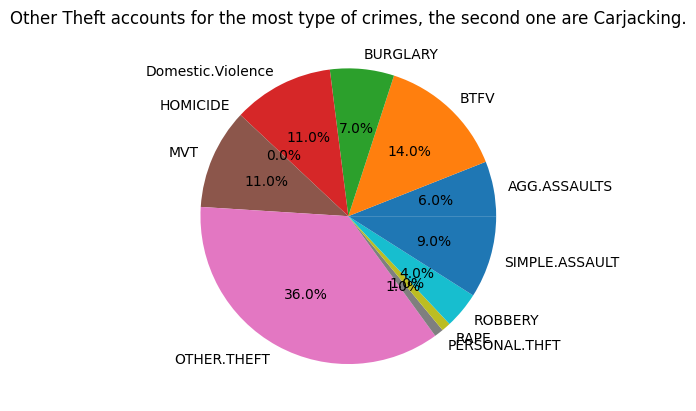

In [ ]:
crime_summary = crime.groupby('Crm Cd').size().reset_index(name='n')
crime_summary['prop'] = round(crime_summary['n'] / crime_summary['n'].sum(), 2) * 100

fig, ax = plt.subplots()
ax.pie(crime_summary['prop'], labels=crime_summary['Crm Cd'], autopct='%1.1f%%')
ax.set_title('Other Theft accounts for the most type of crimes, the second one are Carjacking.')
plt.show()

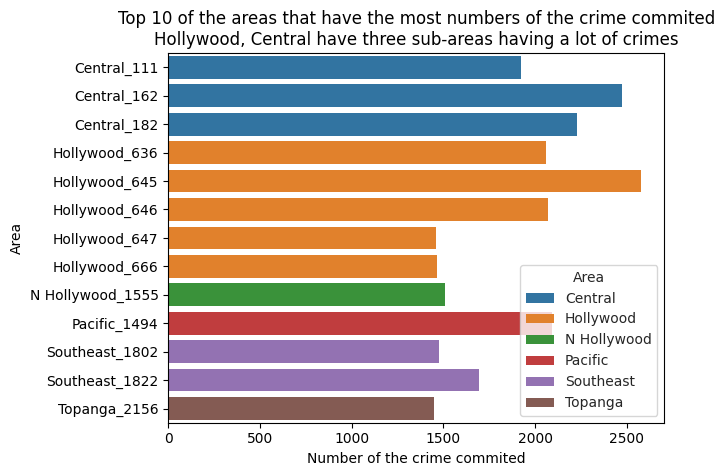

In [ ]:
top10 = crime.groupby(['AREA NAME', 'Rpt Dist No']).size().reset_index(name='n')
top10 = top10[top10['n'].rank() > 1173]
top10['Area'] = top10['AREA NAME'] + '_' + top10['Rpt Dist No'].astype(str)

sns.barplot(data=top10, x='n', y='Area', hue='AREA NAME', dodge=False)
sns.set_style('whitegrid')
plt.title('Top 10 of the areas that have the most numbers of the crime commited\nHollywood, Central have three sub-areas having a lot of crimes')
plt.xlabel('Number of the crime commited')
plt.ylabel('Area')
plt.legend(title='Area')
plt.show()

In [ ]:
crime['Rpt Dist No'].value_counts()

645     2576
162     2475
182     2227
1494    2091
646     2070
        ... 
1996       1
2199       1
716        1
983        1
1537       1
Name: Rpt Dist No, Length: 1186, dtype: int64

ValueError: ignored

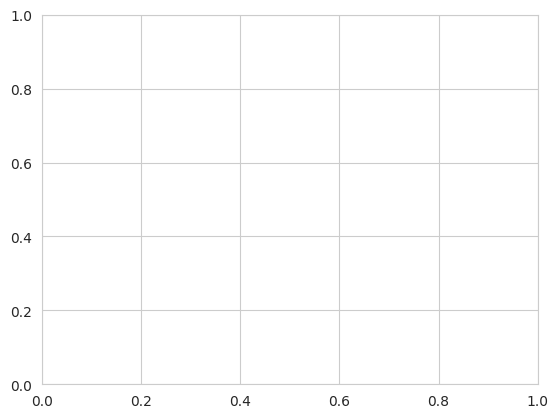

In [ ]:
fig, ax = plt.subplots()
ax.hist(pd.to_datetime(crime['TIME OCC'], format='%H:%M'), bins=24, color='lightblue', edgecolor='grey')
ax.set_title('High Crime Rate Region: When the crimes happened?')
ax.set_xlabel('Time')
ax.set_ylabel('Numbers of crimes')
plt.show()